### Martina Crippa - 915326

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 6 - SOLUTION</span>

All c++ code is stored into exercize_xx/es_xx.x folder, for every point of exercizes.
All data are stored into exercize_xx/data/ folder.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats


### Exercise 06.1

Compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties. 
Parameters:
- $J=1$
- $nspin=50$
- $T=[0.5, 2.0]$
- $h=0.0$ or $h=0.02$
- $mc\_step=10^5$
- $n\_block=10$
- $n\_thermalization=10^5$

- Energy computed with both Metropolis and Gibbs sampling

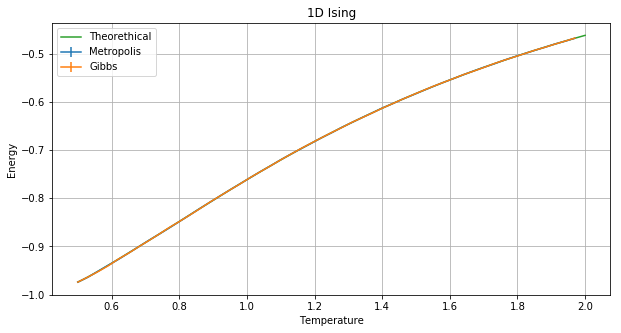

In [3]:
plt.figure(figsize=(10,5))
plt.title('1D Ising')
plt.xlabel('Temperature')
plt.ylabel('Energy')

# Theorethical data
points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th


# Metropolis sampling curve
x, y, err_prog = np.loadtxt("data/energy_temp_metro.out", \
                               usecols=(0,1,2), unpack='true')
plt.errorbar(x,y,yerr=err_prog, label='Metropolis')

# Gibbs sampling curve
x, y, err_prog = np.loadtxt("data/energy_temp_gibbs.out", \
                               usecols=(0,1,2), unpack='true')
plt.errorbar(x,y,yerr=err_prog, label='Gibbs')

# Fit with theorethical curve
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e, label='Theorethical')

plt.grid(True)
plt.legend()
plt.show()

- Specific heat

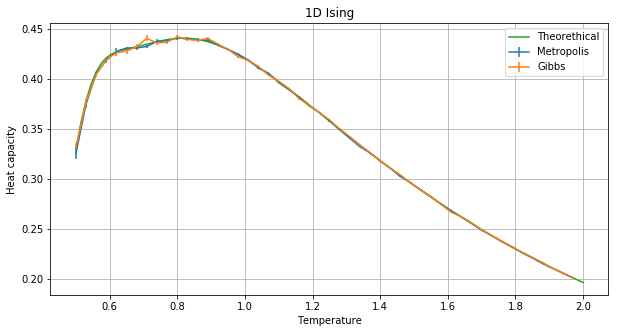

In [4]:
plt.figure(figsize=(10,5))
plt.title('1D Ising')
plt.xlabel('Temperature')
plt.ylabel('Heat capacity')

# Metropolis sampling curve
x, y, err_prog = np.loadtxt("data/heat_temp_metro.out", \
                               usecols=(0,1,2), unpack='true')
plt.errorbar(x,y,yerr=err_prog, label='Metropolis')

# Gibbs sampling curve
x, y, err_prog = np.loadtxt("data/heat_temp_gibbs.out", \
                               usecols=(0,1,2), unpack='true')
plt.errorbar(x,y,yerr=err_prog, label='Gibbs')

# Fit with theorethical curve
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label='Theorethical')

plt.grid(True)
plt.legend()
plt.show()

- Magnetic susceptibility

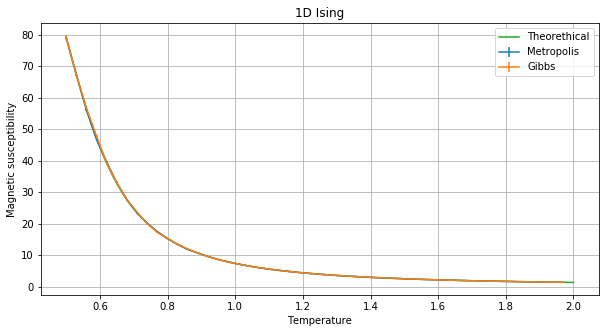

In [5]:
plt.figure(figsize=(10,5))
plt.title('1D Ising')
plt.xlabel('Temperature')
plt.ylabel('Magnetic susceptibility')

# Metropolis sampling curve
x, y, err_prog = np.loadtxt("data/chi_temp_metro.out", \
                               usecols=(0,1,2), unpack='true')
plt.errorbar(x,y,yerr=err_prog, label='Metropolis')

# Gibbs sampling curve
x, y, err_prog = np.loadtxt("data/chi_temp_gibbs.out", \
                               usecols=(0,1,2), unpack='true')
plt.errorbar(x,y,yerr=err_prog, label='Gibbs')

# Fit with theorethical curve
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label='Theorethical')

plt.grid(True)
plt.legend()
plt.show()

- Magnetization for **h=0.02**

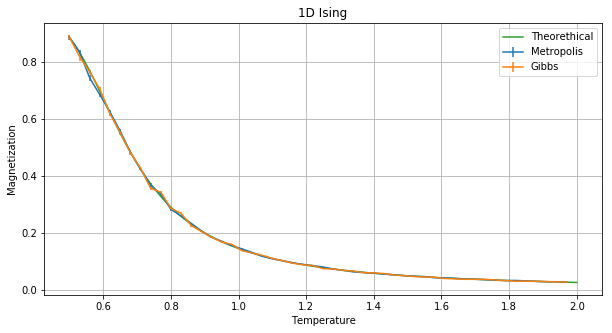

In [6]:
plt.figure(figsize=(10,5))
plt.title('1D Ising')
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.grid(True)

# Metropolis sampling curve
x, y, err_prog = np.loadtxt("data/magnetization_temp_metro.out", \
                               usecols=(0,1,2), unpack='true')
plt.errorbar(x,y,yerr=err_prog, label='Metropolis')

# Gibbs sampling curve
x, y, err_prog = np.loadtxt("data/magnetization_temp_gibbs.out", \
                               usecols=(0,1,2),unpack='true')
plt.errorbar(x,y,yerr=err_prog, label='Gibbs')

# Fit with theorethical curve
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M, label='Theorethical')
plt.legend()

plt.show()